In [1]:
# Best Performance:
"""
>> t1 - b/w 30-70 - log:

Validation Metrics:
MAE: 5.29
MAPE: 2.9301237063471494e+17
MSE: 90.77
RMSE: 9.53
R² Score: 0.41
Adjusted R² Score: 0.34

Test Metrics:
MAE: 5.5
MAPE: 3.162845800604044e+17
MSE: 104.66
RMSE: 10.23
R² Score: 0.35
Adjusted R² Score: 0.35

>> t1 - b/w 30-70 - plain:

Validation Metrics:
MAE: 5.87
MAPE: 7.882922261527991e+17
MSE: 83.32
RMSE: 9.13
R² Score: 0.46
Adjusted R² Score: 0.39

Test Metrics:
MAE: 6.09
MAPE: 7.88136745280889e+17
MSE: 97.69
RMSE: 9.88
R² Score: 0.39
Adjusted R² Score: 0.41

>> t1 - all - plain:

Validation Metrics:
MAE: 9.47
MAPE: 1.0636251503122984e+18
MSE: 227.04
RMSE: 15.07
R² Score: 0.51
Adjusted R² Score: 0.47

Test Metrics:
MAE: 8.48
MAPE: 1.061493283438845e+18
MSE: 170.37
RMSE: 13.05
R² Score: 0.61
Adjusted R² Score: 0.48

>> t2 - all - log:

Validation Metrics:
MAE: 9.17
MAPE: 5.004585629042617e+17
MSE: 265.79
RMSE: 16.3
R² Score: 0.42
Adjusted R² Score: 0.38

Test Metrics:
MAE: 8.22
MAPE: 4.781735923881424e+17
MSE: 196.2
RMSE: 14.01
R² Score: 0.55
Adjusted R² Score: 0.39

"""

'\n>> t1 - b/w 30-70 - log:\n\nValidation Metrics:\nMAE: 5.29\nMAPE: 2.9301237063471494e+17\nMSE: 90.77\nRMSE: 9.53\nR² Score: 0.41\nAdjusted R² Score: 0.34\n\nTest Metrics:\nMAE: 5.5\nMAPE: 3.162845800604044e+17\nMSE: 104.66\nRMSE: 10.23\nR² Score: 0.35\nAdjusted R² Score: 0.35\n\n>> t1 - b/w 30-70 - plain:\n\nValidation Metrics:\nMAE: 5.87\nMAPE: 7.882922261527991e+17\nMSE: 83.32\nRMSE: 9.13\nR² Score: 0.46\nAdjusted R² Score: 0.39\n\nTest Metrics:\nMAE: 6.09\nMAPE: 7.88136745280889e+17\nMSE: 97.69\nRMSE: 9.88\nR² Score: 0.39\nAdjusted R² Score: 0.41\n\n>> t1 - all - plain:\n\nValidation Metrics:\nMAE: 9.47\nMAPE: 1.0636251503122984e+18\nMSE: 227.04\nRMSE: 15.07\nR² Score: 0.51\nAdjusted R² Score: 0.47\n\nTest Metrics:\nMAE: 8.48\nMAPE: 1.061493283438845e+18\nMSE: 170.37\nRMSE: 13.05\nR² Score: 0.61\nAdjusted R² Score: 0.48\n\n>> t2 - all - log:\n\nValidation Metrics:\nMAE: 9.17\nMAPE: 5.004585629042617e+17\nMSE: 265.79\nRMSE: 16.3\nR² Score: 0.42\nAdjusted R² Score: 0.38\n\nTest Met

In [2]:
import pandas as pd
import numpy as np
import joblib
import time
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import xgboost as xgb
from xgboost import XGBRegressor
import optuna
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [3]:
# unpickle - pandas dataframe
df = pd.read_pickle("df_5_final_t1.pkl")
df.shape

(3642, 65)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   groda_Höstvete         3642 non-null   float64
 1   sort_Barranco          3642 non-null   float64
 2   sort_Bright            3642 non-null   float64
 3   sort_Brons             3642 non-null   float64
 4   sort_Cubus             3642 non-null   float64
 5   sort_Ellvis            3642 non-null   float64
 6   sort_Etana             3642 non-null   float64
 7   sort_Fenomen           3642 non-null   float64
 8   sort_Frontal           3642 non-null   float64
 9   sort_Hallfreda         3642 non-null   float64
 10  sort_Hereford          3642 non-null   float64
 11  sort_Informer          3642 non-null   float64
 12  sort_Jonas             3642 non-null   float64
 13  sort_Julius            3642 non-null   float64
 14  sort_KWS_Kerrin        3642 non-null   float64
 15  sort

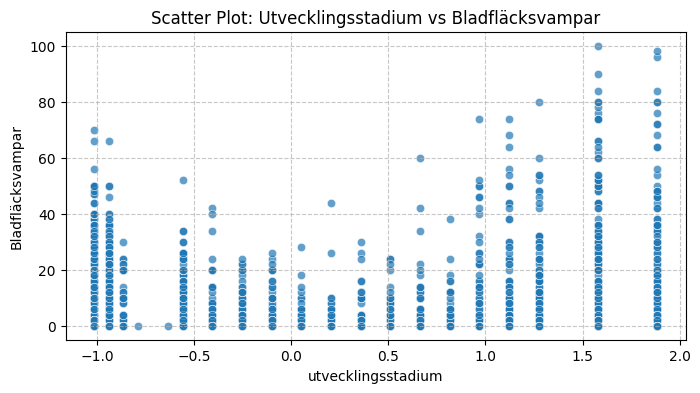

In [5]:
# Scatter plot using matplotlib:
#plt.figure(figsize=(8, 4))
#plt.scatter(df['utvecklingsstadium'], df['Bladfläcksvampar'], alpha=0.5)
#plt.xlabel('Utvecklingsstadium')
#plt.ylabel('Bladfläcksvampar')
#plt.title('Scatter Plot: Utvecklingsstadium vs Bladfläcksvampar')
#plt.grid(True, linestyle='--', alpha=0.7)
#plt.show()

# Scatter plot with seaborn
plt.figure(figsize=(8, 4))
sns.scatterplot(x='utvecklingsstadium', y='Bladfläcksvampar', data=df, alpha=0.7)
plt.title('Scatter Plot: Utvecklingsstadium vs Bladfläcksvampar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Drop unwanted columns:
#df.drop(['delomrade', 'lan'], axis=1, inplace=True)
#df.shape

In [7]:
# Drop unwanted rows:
#df = df[df['Bladfläcksvampar'] >= 1]
#df.shape

In [8]:
X = df.drop(columns=['Bladfläcksvampar','WGS84N','WGS84E']) 
X.shape

(3642, 62)

In [9]:
y = df['Bladfläcksvampar']
y.shape

(3642,)

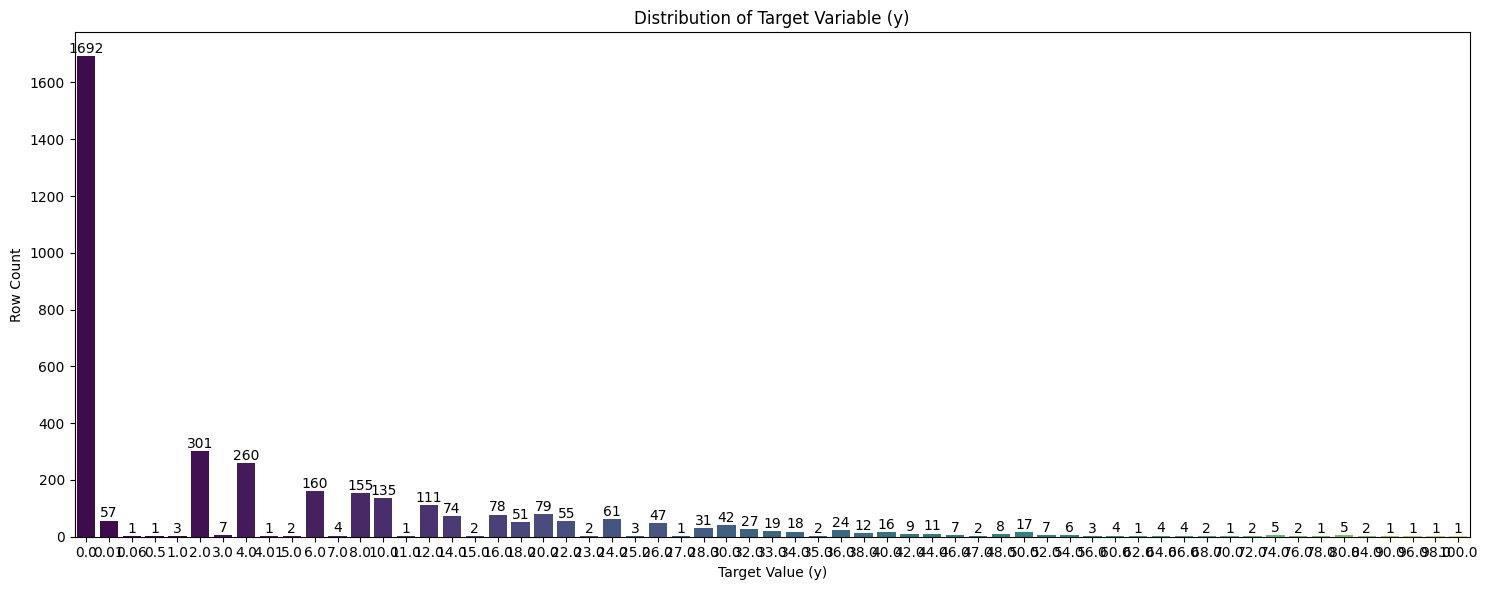

In [10]:
# Target Variable - Distribution Plot:

unique_values, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_values, y=counts, hue=unique_values, palette='viridis', legend=False, dodge=False)

plt.xlabel('Target Value (y)')
plt.ylabel('Row Count')
plt.title('Distribution of Target Variable (y)')

# Add the count numbers on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

#plt.grid(True)
plt.tight_layout()
plt.show()

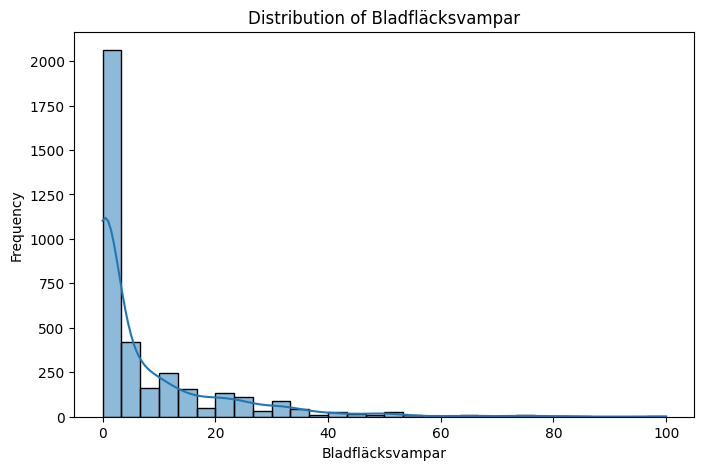

Skewness: 2.589841582105244
Kurtosis: 8.603888440683063


In [11]:
# Histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.xlabel("Bladfläcksvampar")
plt.ylabel("Frequency")
plt.title("Distribution of Bladfläcksvampar")
plt.show()

# Check skewness and kurtosis
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(y)}")
print(f"Kurtosis: {kurtosis(y)}")

In [12]:
#  Transformations - scaling to reduce data skew:
log_trans = 'yes'
if log_trans == 'yes':
    y = np.log1p(y)  # Lograthimic Transformation - high skew - best for this
    #y = np.sqrt(y)  # Square Root Transformation - medium skew
    #y = np.power(y)  # Cube Root Transformation 

print(y.describe())

count    3642.000000
mean        1.236099
std         1.345564
min         0.000000
25%         0.000000
50%         1.098612
75%         2.397895
max         4.615121
Name: Bladfläcksvampar, dtype: float64


In [13]:
# Handle NaN and infinite values in y after log:

#print("NaN values in y:", np.isnan(y).sum())
#print("Infinity values in y:", np.isinf(y).sum())
#y.fillna(y.median(), inplace=True)  # Replace NaNs with median value
#y = y.replace([np.inf, -np.inf], y.median()) # Replace Infinite with median value

# Check for NaN and infinite values in y
nan_count = np.isnan(y).sum()
inf_count = np.isinf(y).sum()

print("NaN values in y:", nan_count)
print("Infinity values in y:", inf_count)

# Replace NaN and infinite values with median
if nan_count > 0 or inf_count > 0:
    median_value = y.median()
    y.fillna(median_value, inplace=True)  # Replace NaNs
    y = y.replace([np.inf, -np.inf], median_value)  # Replace Infinite values

    print(f"Replaced {nan_count + inf_count} values with median: {median_value}")

# Display the number of affected rows
affected_rows = (nan_count + inf_count)
print("Number of rows affected:", affected_rows)


NaN values in y: 0
Infinity values in y: 0
Number of rows affected: 0


In [14]:
y

0       1.386294
1       1.386294
2       0.693147
3       0.000000
4       1.386294
          ...   
3637    1.945910
3638    1.098612
3639    0.000000
3640    1.945910
3641    0.009950
Name: Bladfläcksvampar, Length: 3642, dtype: float64

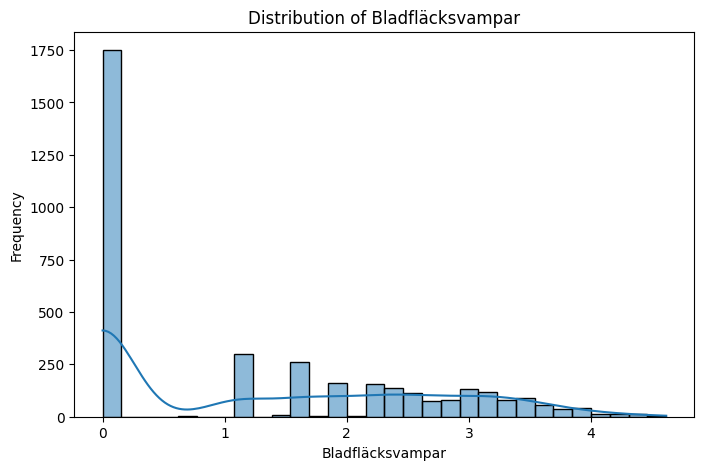

Skewness: 0.5226437474416465
Kurtosis: -1.1876782021076064


In [15]:
# Histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.xlabel("Bladfläcksvampar")
plt.ylabel("Frequency")
plt.title("Distribution of Bladfläcksvampar")
plt.show()

# Check skewness and kurtosis
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(y)}")
print(f"Kurtosis: {kurtosis(y)}")

In [16]:
# Split train, test and validation data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 

In [17]:
# Model:

# Start timing
t0 = time.time()

# Define the base model
xgb = XGBRegressor(random_state=1)

# Define the hyperparameter grid for Randomized Search (Coarse Search)
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 11, 15],
    'min_child_weight': [1, 3, 5, 7, 10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1.0]
}

# Check if best parameters file exists
try:
    best_params_xgb = joblib.load('best_params_xgb_t1_c_Coarse.pkl')
    print("Loaded best parameters from file.")
except FileNotFoundError:
    print("Best parameters not found. Running Randomized Search for coarse search...")
    
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=100,  # Number of random samples to test
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1,
        random_state=1
    )
    
    random_search.fit(X_train, y_train)
    best_params_xgb = random_search.best_params_
    print("Best parameters from Randomized Search:", best_params_xgb)
    
    print("Running Bayesian Optimization for fine search...")
    
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', max(50, best_params_xgb['n_estimators'] - 50), best_params_xgb['n_estimators'] + 50, step=10),
            'learning_rate': trial.suggest_float('learning_rate', best_params_xgb['learning_rate'] * 0.8, best_params_xgb['learning_rate'] * 1.2),
            'max_depth': trial.suggest_int('max_depth', max(2, best_params_xgb['max_depth'] - 2), best_params_xgb['max_depth'] + 2),
            'min_child_weight': trial.suggest_int('min_child_weight', max(1, best_params_xgb['min_child_weight'] - 1), best_params_xgb['min_child_weight'] + 1),
            'subsample': trial.suggest_float('subsample', max(0.5, best_params_xgb['subsample'] - 0.1), min(1.0, best_params_xgb['subsample'] + 0.1)),
            'colsample_bytree': trial.suggest_float('colsample_bytree', max(0.5, best_params_xgb['colsample_bytree'] - 0.1), min(1.0, best_params_xgb['colsample_bytree'] + 0.1)),
            'gamma': trial.suggest_float('gamma', max(0, best_params_xgb['gamma'] - 0.1), best_params_xgb['gamma'] + 0.1),
            'reg_alpha': trial.suggest_float('reg_alpha', max(0, best_params_xgb['reg_alpha'] - 0.01), best_params_xgb['reg_alpha'] + 0.01),
            'reg_lambda': trial.suggest_float('reg_lambda', max(0, best_params_xgb['reg_lambda'] - 0.01), best_params_xgb['reg_lambda'] + 0.01),
        }
        
        model = XGBRegressor(random_state=1, **params)
        score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
        return score
    
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)  # Reduce trials since it's a fine search
    
    best_params_xgb = study.best_params
    joblib.dump(best_params_xgb, 'best_params_xgb_t1_c_Coarse.pkl')
    print("Best parameters from Bayesian Optimization saved to file.")

# Initialize model with best parameters
best_xgb = XGBRegressor(random_state=1, early_stopping_rounds=20, **best_params_xgb)

# Fit the training data to the model
best_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=10
)

# End timing
t1 = time.time()
print("Seconds Taken:", t1 - t0)

Best parameters not found. Running Randomized Search for coarse search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[I 2025-03-10 15:18:01,205] A new study created in memory with name: no-name-99c8bf3d-b5bd-47e4-a9d6-b3d37eb0acc5


Best parameters from Randomized Search: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
Running Bayesian Optimization for fine search...


[I 2025-03-10 15:18:04,835] Trial 0 finished with value: -1.0152542069224153 and parameters: {'n_estimators': 410, 'learning_rate': 0.010737376826999717, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9705359992191676, 'colsample_bytree': 0.7390575767095161, 'gamma': 0.08538175573732934, 'reg_alpha': 0.10882507393797348, 'reg_lambda': 1.1020430913804003e-05}. Best is trial 0 with value: -1.0152542069224153.
[I 2025-03-10 15:18:09,977] Trial 1 finished with value: -1.0127219221353259 and parameters: {'n_estimators': 440, 'learning_rate': 0.008594552790578492, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.8501231850047686, 'colsample_bytree': 0.8233287617739657, 'gamma': 0.18210059823102817, 'reg_alpha': 0.10401187642792778, 'reg_lambda': 0.00024155480190976686}. Best is trial 1 with value: -1.0127219221353259.
[I 2025-03-10 15:18:14,735] Trial 2 finished with value: -1.0092658396703802 and parameters: {'n_estimators': 440, 'learning_rate': 0.010838824082961896, 'max_depth

Best parameters from Bayesian Optimization saved to file.
[0]	validation_0-rmse:1.33876	validation_1-rmse:1.34343
[10]	validation_0-rmse:1.28626	validation_1-rmse:1.29698
[20]	validation_0-rmse:1.24066	validation_1-rmse:1.25627
[30]	validation_0-rmse:1.19994	validation_1-rmse:1.22095
[40]	validation_0-rmse:1.16336	validation_1-rmse:1.18959
[50]	validation_0-rmse:1.13082	validation_1-rmse:1.16292
[60]	validation_0-rmse:1.10106	validation_1-rmse:1.13917
[70]	validation_0-rmse:1.07557	validation_1-rmse:1.12068
[80]	validation_0-rmse:1.05163	validation_1-rmse:1.10306
[90]	validation_0-rmse:1.03014	validation_1-rmse:1.08799
[100]	validation_0-rmse:1.01123	validation_1-rmse:1.07506
[110]	validation_0-rmse:0.99263	validation_1-rmse:1.06302
[120]	validation_0-rmse:0.97699	validation_1-rmse:1.05420
[130]	validation_0-rmse:0.96249	validation_1-rmse:1.04597
[140]	validation_0-rmse:0.94959	validation_1-rmse:1.03903
[150]	validation_0-rmse:0.93719	validation_1-rmse:1.03342
[160]	validation_0-rmse:0

In [18]:
best_params_xgb

{'n_estimators': 440,
 'learning_rate': 0.009039124470667856,
 'max_depth': 8,
 'min_child_weight': 5,
 'subsample': 0.8701799361378325,
 'colsample_bytree': 0.7374793048299624,
 'gamma': 0.17910708546119605,
 'reg_alpha': 0.10357902728194106,
 'reg_lambda': 0.001261082178097076}

In [19]:
eval_result = best_xgb.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse'])) #training
print(training_rounds)

range(0, 440)


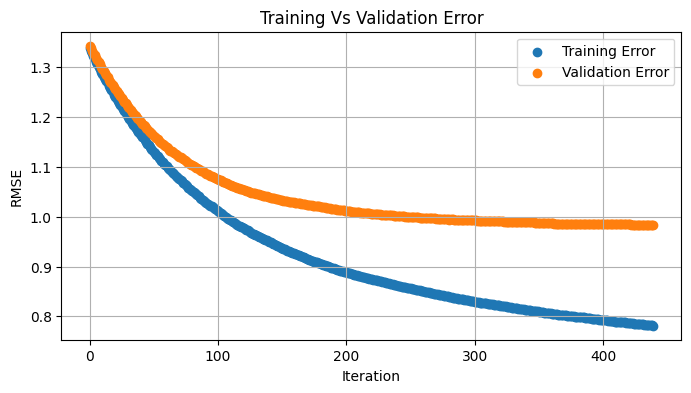

In [20]:
plt.figure(figsize=(8,4))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [21]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error_custom(y_true, y_pred):
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace zeros with a small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate on validation set
y_val_pred = best_xgb.predict(X_val)

# Inverse Transformation:
if log_trans == 'yes':
    y_val = np.expm1(y_val)
    y_val_pred = np.expm1(y_val_pred)
    #y_val = np.square(y_val)
    #y_val_pred = np.square(y_val_pred)
    #y_val = np.power(y_val)
    #y_val_pred = np.power(y_val_pred)

print("\nValidation Metrics:")
print("MAE:", round(mean_absolute_error(y_val, y_val_pred), 2))
print("MAPE:", round(mean_absolute_percentage_error(y_val, y_val_pred) * 100, 2))
print("MSE:", round(mean_squared_error(y_val, y_val_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2))
print("R² Score:", round(r2_score(y_val, y_val_pred), 2))

# Calculate adjusted R² score
r2 = r2_score(y_val, y_val_pred)
n = len(y_val)  # Number of observations
p = X_val.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R² Score:", round(adjusted_r2, 2))

# Evaluate on test set
y_test_pred = best_xgb.predict(X_test)

# Inverse Transformation:
if log_trans == 'yes':
    y_test = np.expm1(y_test)
    y_test_pred = np.expm1(y_test_pred)
    #y_test = np.square(y_test)
    #y_test_pred = np.square(y_test_pred)
    #y_test = np.power(y_test)
    #y_test_pred = np.power(y_test_pred)

print("\nTest Metrics:")
print("MAE:", round(mean_absolute_error(y_test, y_test_pred), 2))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2))
print("MSE:", round(mean_squared_error(y_test, y_test_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))
print("R² Score:", round(r2_score(y_test, y_test_pred), 2))

# Calculate adjusted R² score
r2_test = r2_score(y_test, y_test_pred)
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R² Score:", round(adjusted_r2, 2))


Validation Metrics:
MAE: 5.29
MAPE: 2.96479314001982e+17
MSE: 90.55
RMSE: 9.52
R² Score: 0.41
Adjusted R² Score: 0.34

Test Metrics:
MAE: 5.55
MAPE: 3.182888834964687e+17
MSE: 107.43
RMSE: 10.37
R² Score: 0.33
Adjusted R² Score: 0.35


In [22]:
# Validation - Check for min, max, NaN, infinite values
print("\nMin y_val:", np.min(y_val), "Max y_val:", np.max(y_val))
print("Min y_val_pred:", np.min(y_val_pred), "Max y_val_pred:", np.max(y_val_pred))
print("NaN in y_val:", np.isnan(y_val).sum(), "NaN in y_val_pred:", np.isnan(y_val_pred).sum())
print("Inf in y_val:", np.isinf(y_val).sum(), "Inf in y_val_pred:", np.isinf(y_val_pred).sum())

# Test - Check for min, max, NaN, infinite values
print("\nMin y_test:", np.min(y_test), "Max y_test:", np.max(y_test))
print("Min y_test_pred:", np.min(y_test_pred), "Max y_test_pred:", np.max(y_test_pred))
print("NaN in y_test:", np.isnan(y_test).sum(), "NaN in y_test_pred:", np.isnan(y_test_pred).sum())
print("Inf in y_test:", np.isinf(y_test).sum(), "Inf in y_test_pred:", np.isinf(y_test_pred).sum())


Min y_val: 0.0 Max y_val: 96.0
Min y_val_pred: -0.06095822 Max y_val_pred: 56.819622
NaN in y_val: 0 NaN in y_val_pred: 0
Inf in y_val: 0 Inf in y_val_pred: 0

Min y_test: 0.0 Max y_test: 80.00000000000003
Min y_test_pred: -0.20969668 Max y_test_pred: 56.47662
NaN in y_test: 0 NaN in y_test_pred: 0
Inf in y_test: 0 Inf in y_test_pred: 0


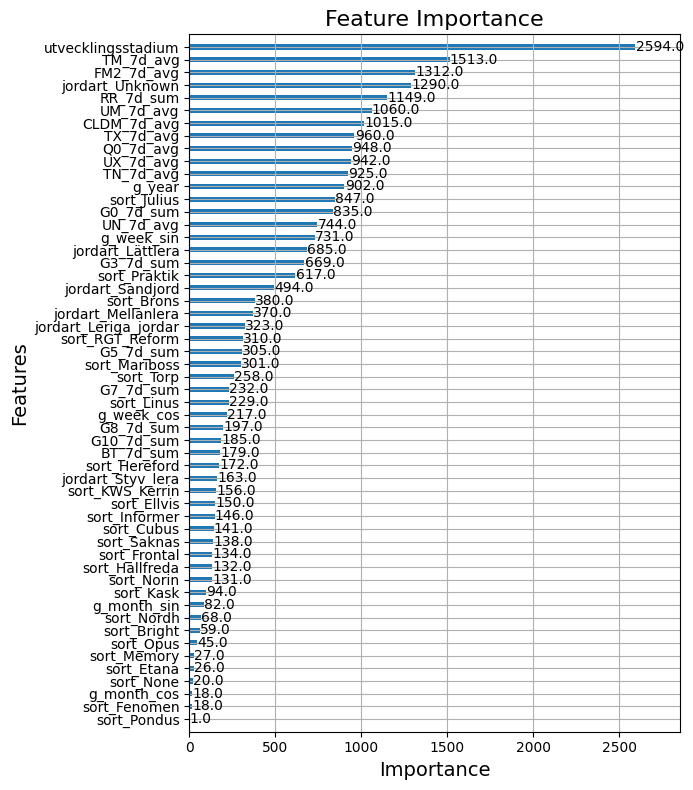

In [23]:
# Extract feature importance and plot all features

from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(7, 8))  # Set the figure size explicitly here
plot_importance(best_xgb, importance_type='weight', max_num_features=None, height=0.4, ax=ax)

plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

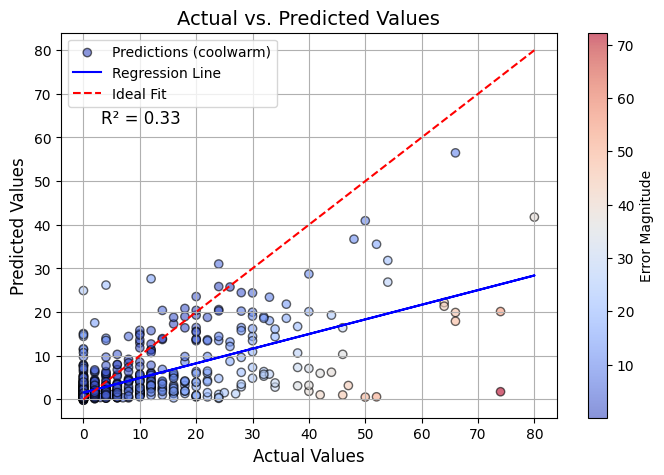

In [24]:
from sklearn.linear_model import LinearRegression

# Ensure y_test and y_test_pred are NumPy arrays
y_test = np.array(y_test)
y_test_pred = np.array(y_test_pred)

# Scatter Plot (Actual vs. Predicted Values)
plt.figure(figsize=(8, 5))

# Compute errors and color points by error magnitude
errors = abs(y_test - y_test_pred)

# Scatter plot with color based on error
#plt.scatter(y_test, y_test_pred, c=errors, cmap='coolwarm', alpha=0.6, edgecolors='k', label="Predictions (coolwarm)")
scatter = plt.scatter(y_test, y_test_pred, c=errors, cmap='coolwarm', alpha=0.6, edgecolors='k', label="Predictions (coolwarm)")

# Fit a linear regression model to draw a regression line
model = LinearRegression()
model.fit(y_test.reshape(-1, 1), y_test_pred)
plt.plot(y_test, model.predict(y_test.reshape(-1, 1)), color='blue', linestyle='-', label='Regression Line')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")  # Add Ideal Fit Line
plt.text(0.08, 0.80, f'R² = {r2_test:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')  # Display R² value on the plot:

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs. Predicted Values", fontsize=14)
cbar = plt.colorbar(scatter, label='Error Magnitude')  # Add a color bar to show error scale
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

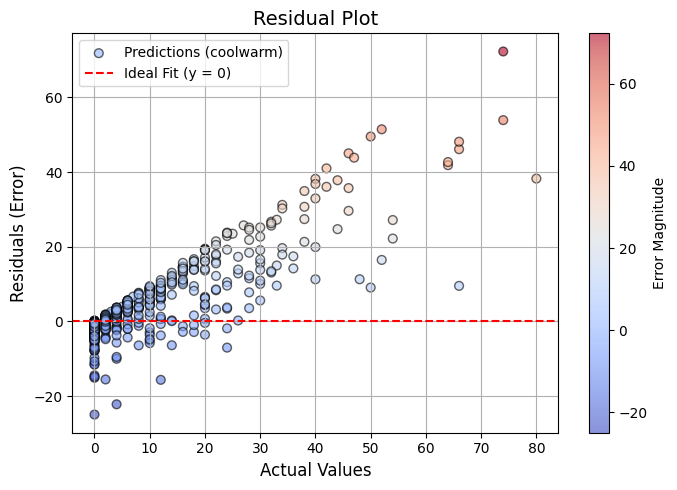

In [25]:
import matplotlib.pyplot as plt

# Residuals Calculation
residuals = y_test - y_test_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_test, residuals, alpha=0.6, edgecolors='k', c=residuals, cmap='coolwarm', label="Predictions (coolwarm)", s=40)
plt.axhline(0, color='red', linestyle='--', label="Ideal Fit (y = 0)") # Add the red horizontal line at 0 for Ideal Fit

plt.title("Residual Plot", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Residuals (Error)", fontsize=12)
plt.colorbar(label='Error Magnitude')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

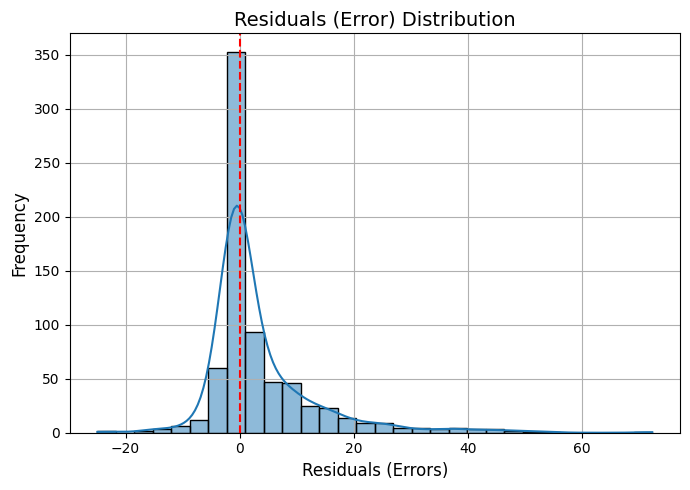

In [26]:
# Histogram of Residuals (Error Distribution):

#residuals = y_test - y_test_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')

plt.title("Residuals (Error) Distribution", fontsize=14)
plt.xlabel("Residuals (Errors)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation:
# If the distribution is bell-shaped and centered at zero, errors are normally distributed, meaning the model is unbiased.
# If it's skewed (more errors on one side), the model systematically under- or over-predicts.
# If it’s wide, the model has high variance.

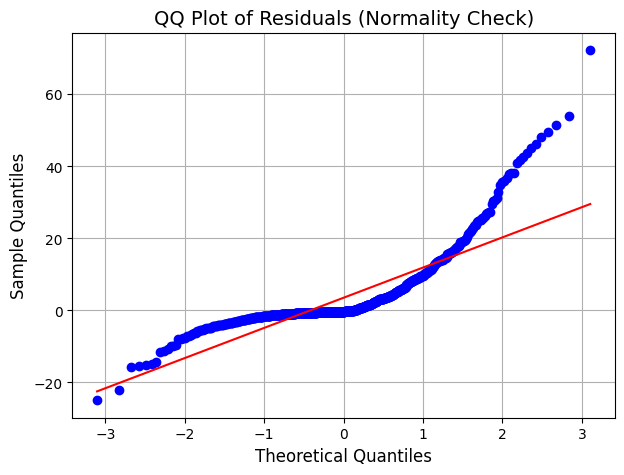

In [27]:
# QQ Plot (Normality Check for Residuals):

#residuals = y_test - y_test_pred

plt.figure(figsize=(7, 5))

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (Normality Check)", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True)
plt.show()

# Interpretation:
# Straight Line → Errors are normally distributed (good).
# Curved S-shape → Errors are skewed, indicating systematic bias.
# Heavy tails (points deviating at ends) → Model struggles with extreme values.

In [28]:
# List top residuals:

#residuals = y_test - y_test_pred

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Index': np.arange(len(y_test)),  # Original indices
    'y_test': y_test,
    'y_test_pred': y_test_pred,
    'Residuals': residuals
})

# Sort by absolute residuals in descending order
results_sorted = results.iloc[(-results['Residuals'].abs()).argsort()]

# Get the top 10 rows with the highest residuals
top_10_residuals = results_sorted.head(10)

# Display the results
print(top_10_residuals)

     Index  y_test  y_test_pred  Residuals
455    455    74.0     1.739537  72.260463
385    385    74.0    20.113522  53.886478
400    400    52.0     0.570987  51.429013
491    491    50.0     0.499371  49.500629
383    383    66.0    17.892952  48.107048
46      46    66.0    19.891844  46.108156
465    465    46.0     0.993621  45.006379
723    723    47.0     3.161958  43.838042
477    477    64.0    21.335052  42.664948
375    375    64.0    22.161024  41.838976


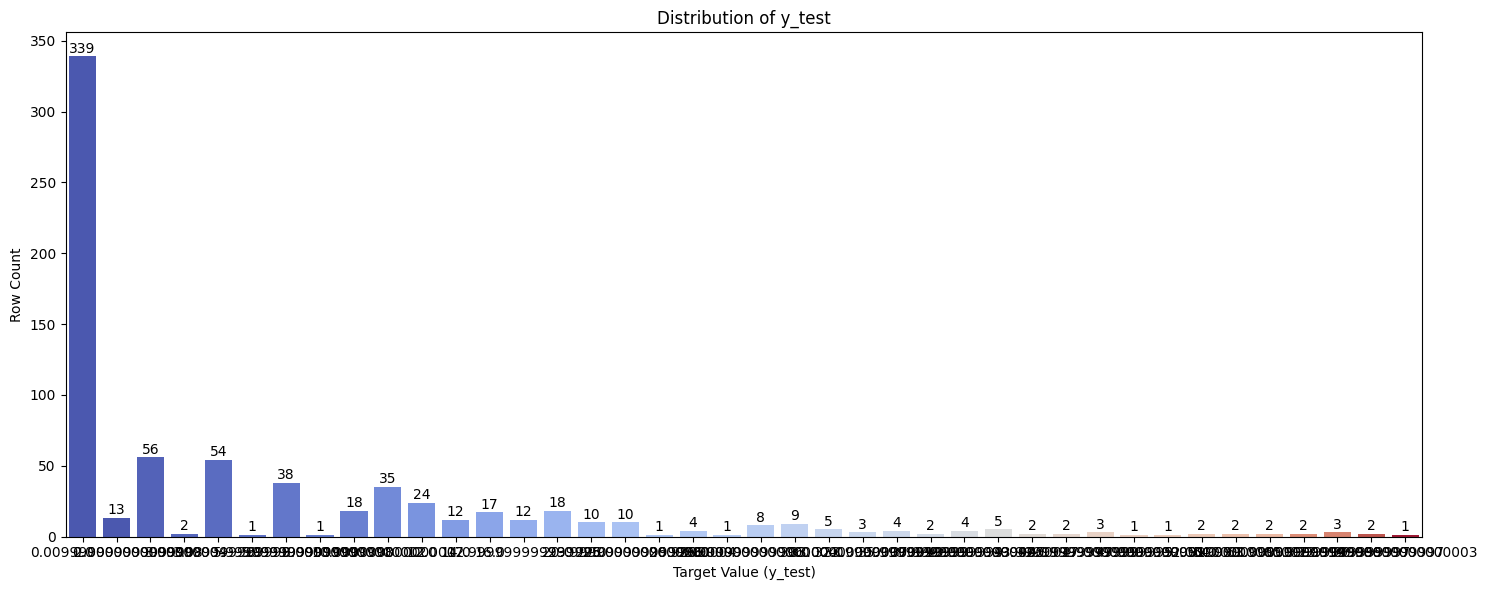

In [29]:
# y_test - Distribution Plot:

unique_values, counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_values, y=counts, hue=unique_values, palette='coolwarm', legend=False, dodge=False)

plt.xlabel('Target Value (y_test)')
plt.ylabel('Row Count')
plt.title('Distribution of y_test')

# Add the count numbers on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

#plt.grid(True)
plt.tight_layout()
plt.show()

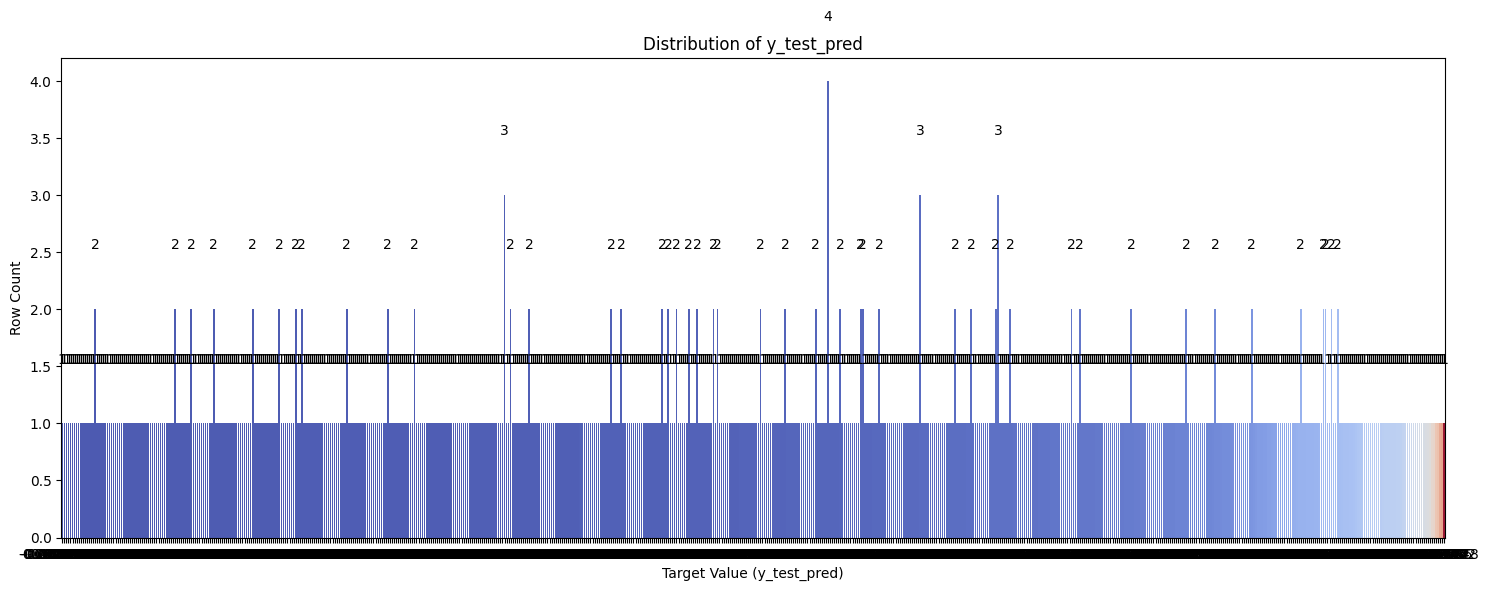

In [30]:
# y_test_pred - Distribution Plot:

unique_values, counts = np.unique(y_test_pred, return_counts=True)

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_values, y=counts, hue=unique_values, palette='coolwarm', legend=False, dodge=False)

plt.xlabel('Target Value (y_test_pred)')
plt.ylabel('Row Count')
plt.title('Distribution of y_test_pred')

# Add the count numbers on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

#plt.grid(True)
plt.tight_layout()
plt.show()

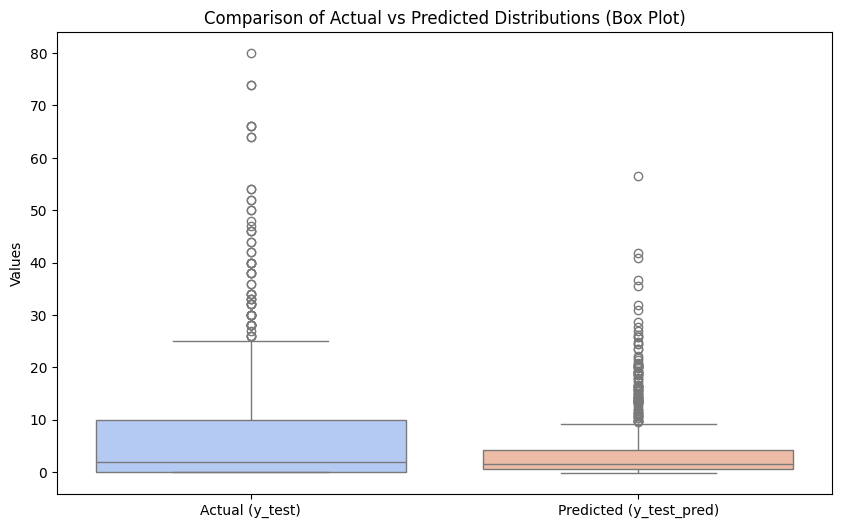

In [31]:
# Box Plot:

plt.figure(figsize=(10, 6))
sns.boxplot(data=[y_test, y_test_pred], palette='coolwarm')

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Actual (y_test)', 'Predicted (y_test_pred)'])
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Distributions (Box Plot)')
plt.show()

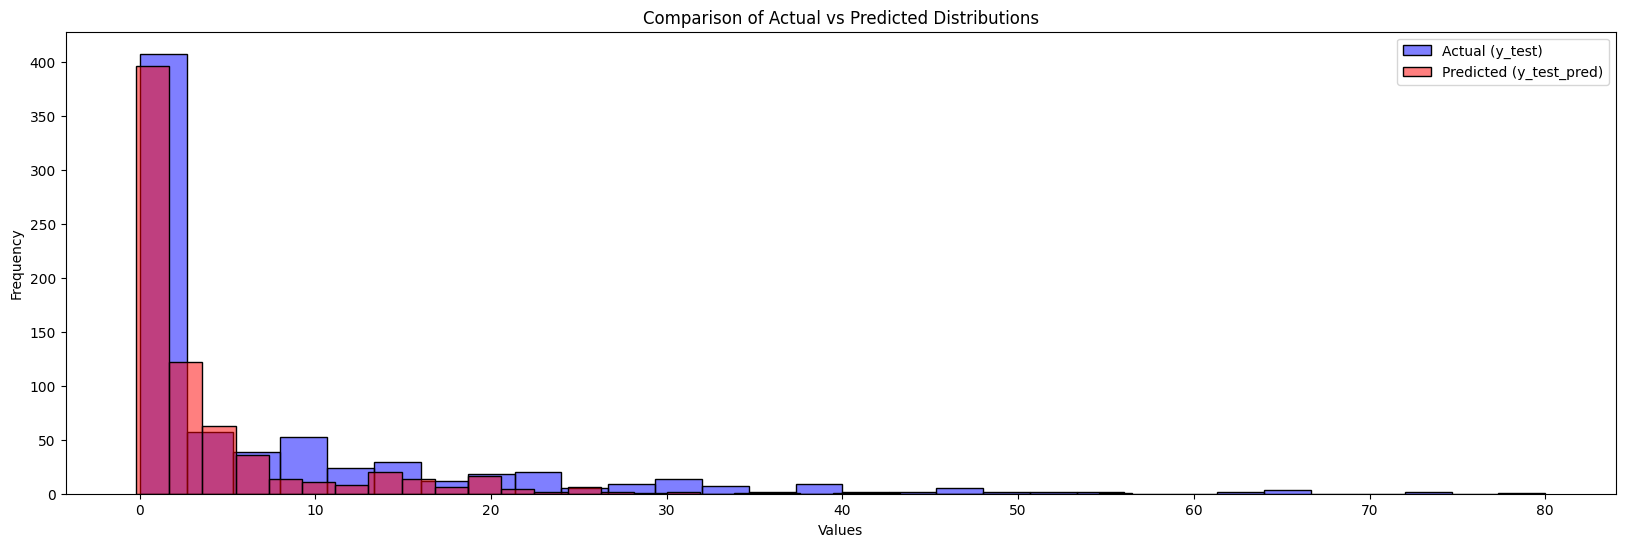

In [32]:
# Histogram - y_test vs y_test_pred distribution:

plt.figure(figsize=(20, 6))
sns.histplot(y_test, color='blue', label='Actual (y_test)', kde=False, bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='red', label='Predicted (y_test_pred)', kde=False, bins=30, alpha=0.5)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Comparison of Actual vs Predicted Distributions')
plt.legend()
plt.show()

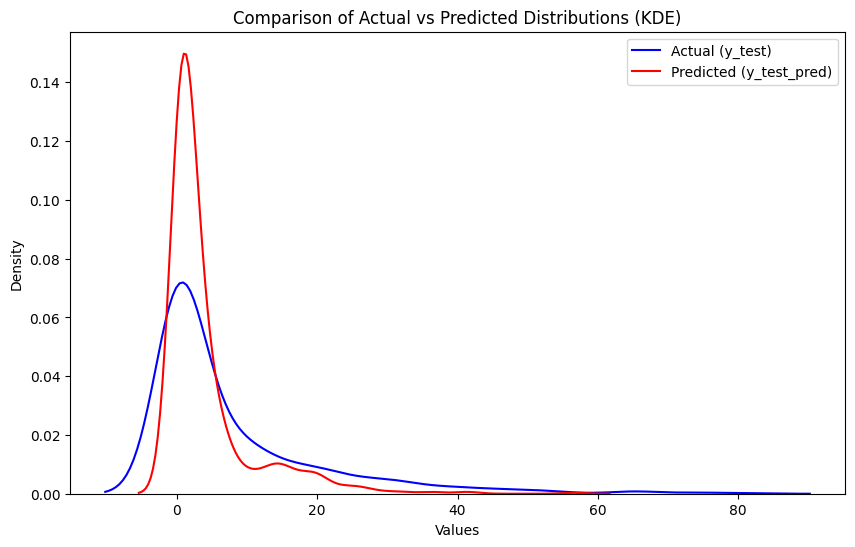

In [33]:
# KDE (Kernal Density Estimate) Plot - y_test vs y_test_pred distribution:

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual (y_test)')
sns.kdeplot(y_test_pred, color='red', label='Predicted (y_test_pred)')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Distributions (KDE)')
plt.legend()
plt.show()